In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Load the dataset

In [63]:
par= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data")
print(par.head(4))
par.info()

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer    ...     \
0           0.00007   0.00370   0.00554     0.01109       0.04374    ...      
1           0.00008   0.00465   0.00696     0.01394       0.06134    ...      
2           0.00009   0.00544   0.00781     0.01633       0.05233    ...      
3           0.00009   0.00502   0.00698     0.01505       0.05492    ...      

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.0751

In [64]:
par.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [65]:
par.isnull().any()
#par.isnull().values.any()
#par.isnull().sum()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

# Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

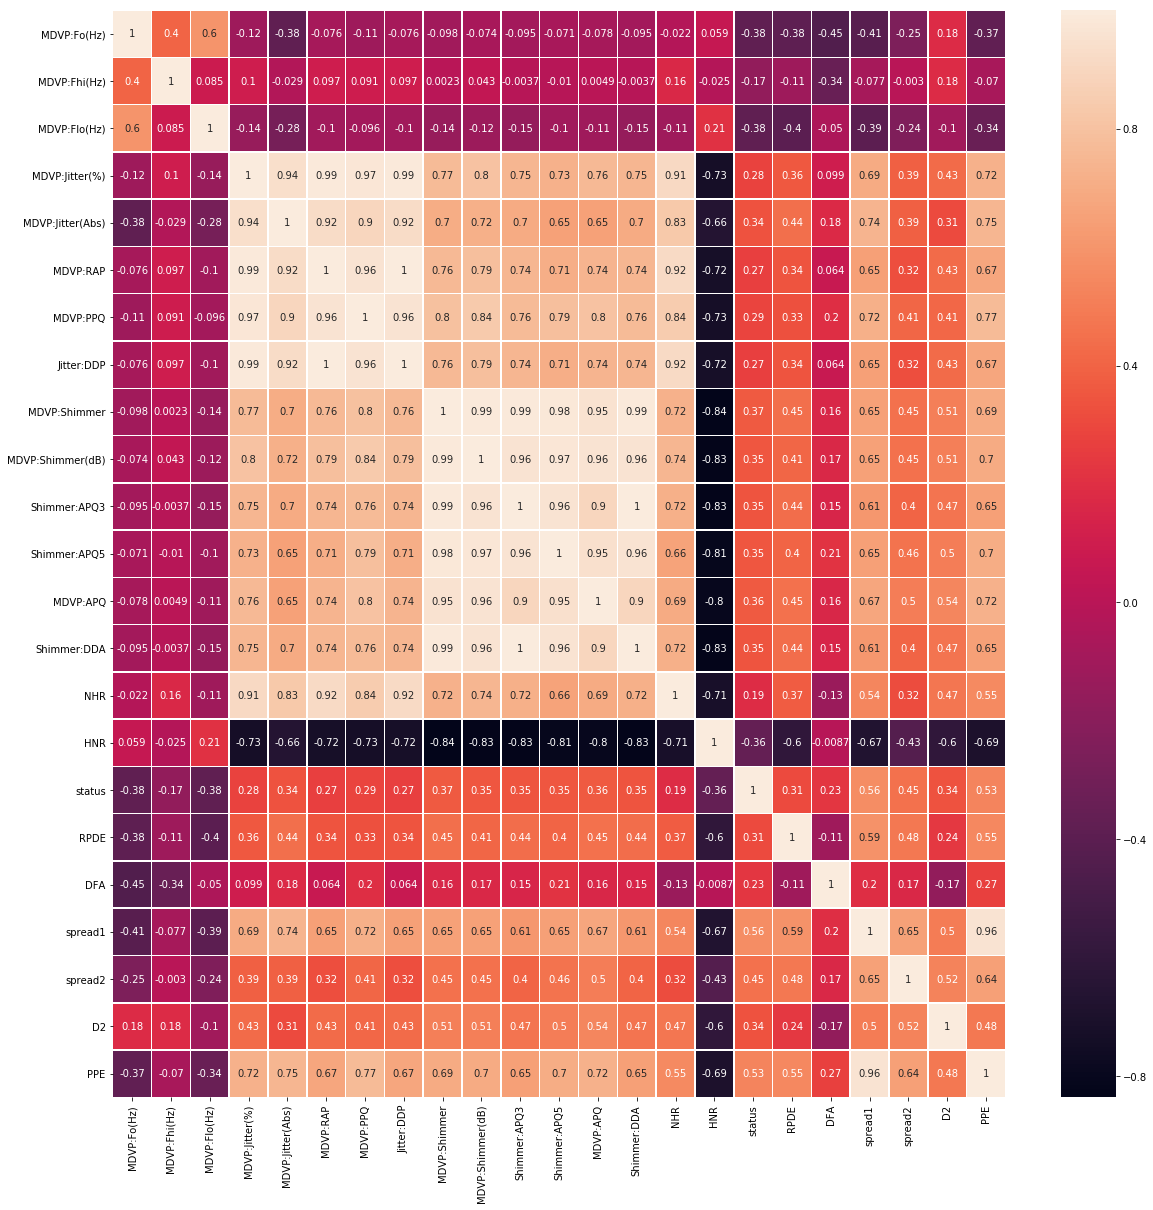

In [66]:
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(par.corr(),annot=True,linewidths=0.5, ax=ax);


This heat map shows not much correlation exist between status and other independent variables.

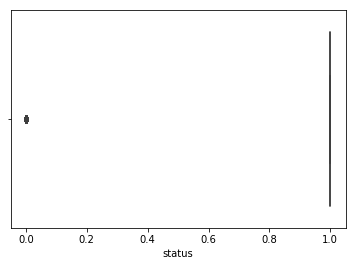

In [67]:
sns.boxplot(x=par['status'])

Above plot shows very less (48 /197) detected with PD 

In [68]:
corr=par.corr()
corr[(corr['status']).abs()>0.35]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058
Shimmer:APQ5,-0.070682,-0.009997,-0.101095,0.725561,0.648961,0.709927,0.786780,0.709907,0.982835,0.973751,...,0.960072,0.658080,-0.813753,0.351148,0.399903,0.213873,0.646809,0.457195,0.502174,0.702456
MDVP:APQ,-0.077774,0.004937,-0.107293,0.758255,0.648793,0.737455,0.804139,0.737439,0.950083,0.960977,...,0.896647,0.694019,-0.800407,0.364316,0.451379,0.157276,0.673158,0.502188,0.536869,0.721694
HNR,0.059144,-0.024893,0.210851,-0.728165,-0.656810,-0.721543,-0.731510,-0.721494,-0.835271,-0.827805,...,-0.827130,-0.714072,1.000000,-0.361515,-0.598736,-0.008665,-0.673210,-0.431564,-0.601401,-0.692876
status,-0.383535,-0.166136,-0.380200,0.278220,0.338653,0.266668,0.288698,0.266646,0.367430,0.350697,...,0.347608,0.189429,-0.361515,1.000000,0.308567,0.231739,0.564838,0.454842,0.340232,0.531039
spread1,-0.413738,-0.076658,-0.394857,0.693577,0.735779,0.648328,0.716489,0.648328,0.654734,0.652547,...,0.610971,0.540865,-0.673210,0.564838,0.591117,0.195668,1.000000,0.652358,0.495123,0.962435
spread2,-0.249450,-0.002954,-0.243829,0.385123,0.388543,0.324407,0.407605,0.324377,0.452025,0.454314,...,0.402223,0.318099,-0.431564,0.454842,0.479905,0.166548,0.652358,1.000000,0.523532,0.644711


E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


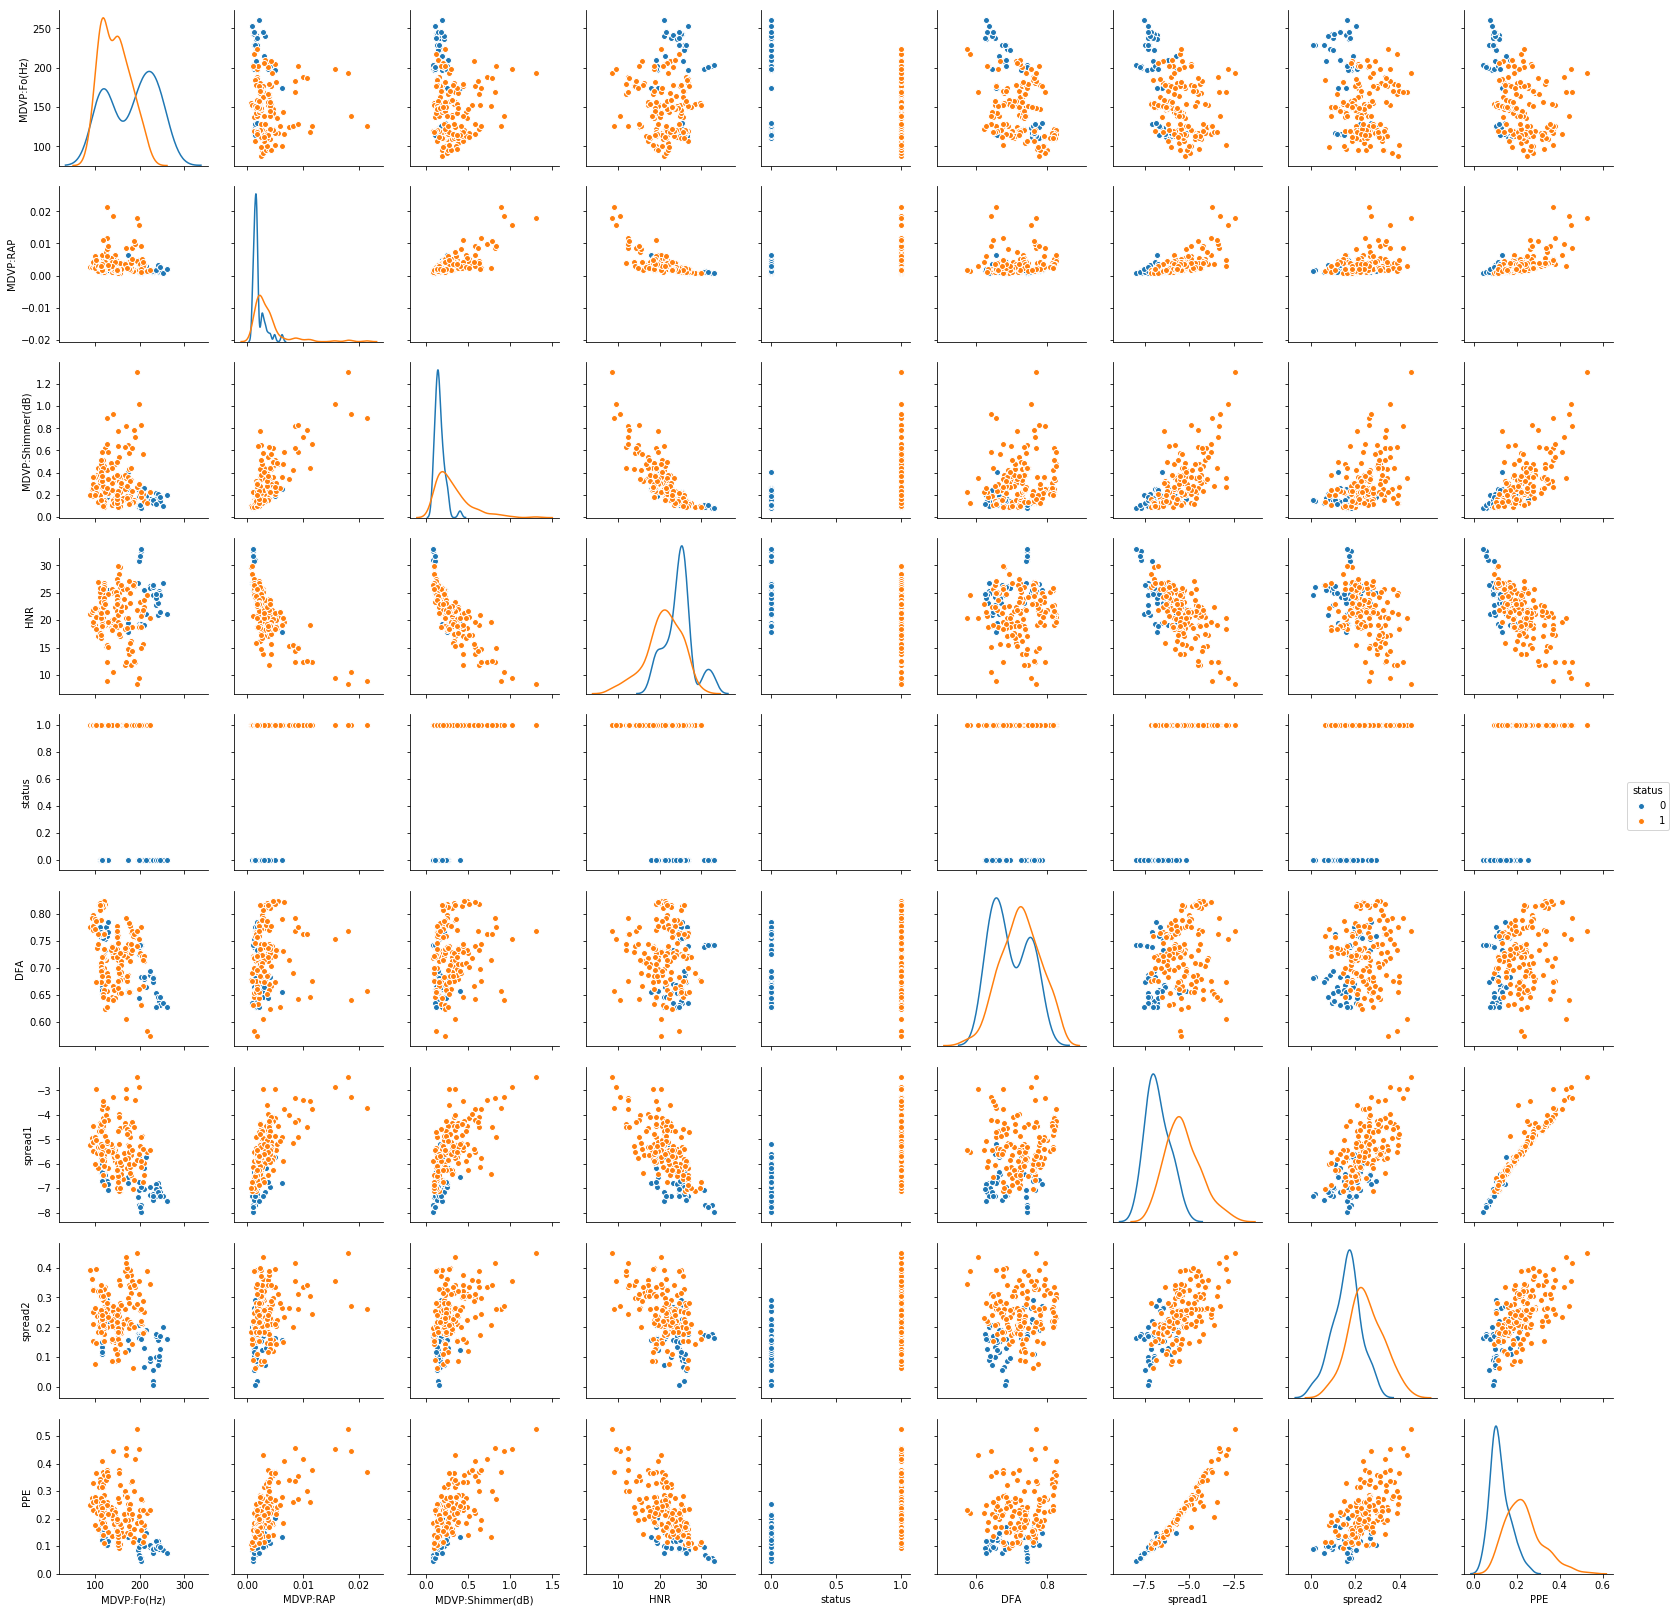

In [69]:
sns.pairplot(par,diag_kind='kde',hue='status', vars=['MDVP:Fo(Hz)'
                                                     ,'MDVP:RAP',
                                                     'MDVP:Shimmer(dB)',
                                                     'HNR',
                                                     'status',
                                                     'DFA', 
                                                     'spread1', 
                                                     'spread2',                                                                        
                                                     'PPE' ]);

This shows MDVP shimmer is positively correlated and HNR is negatively correlated. 
Spread 1 has clear picture showing as when spread increases , status is tend to be 1.

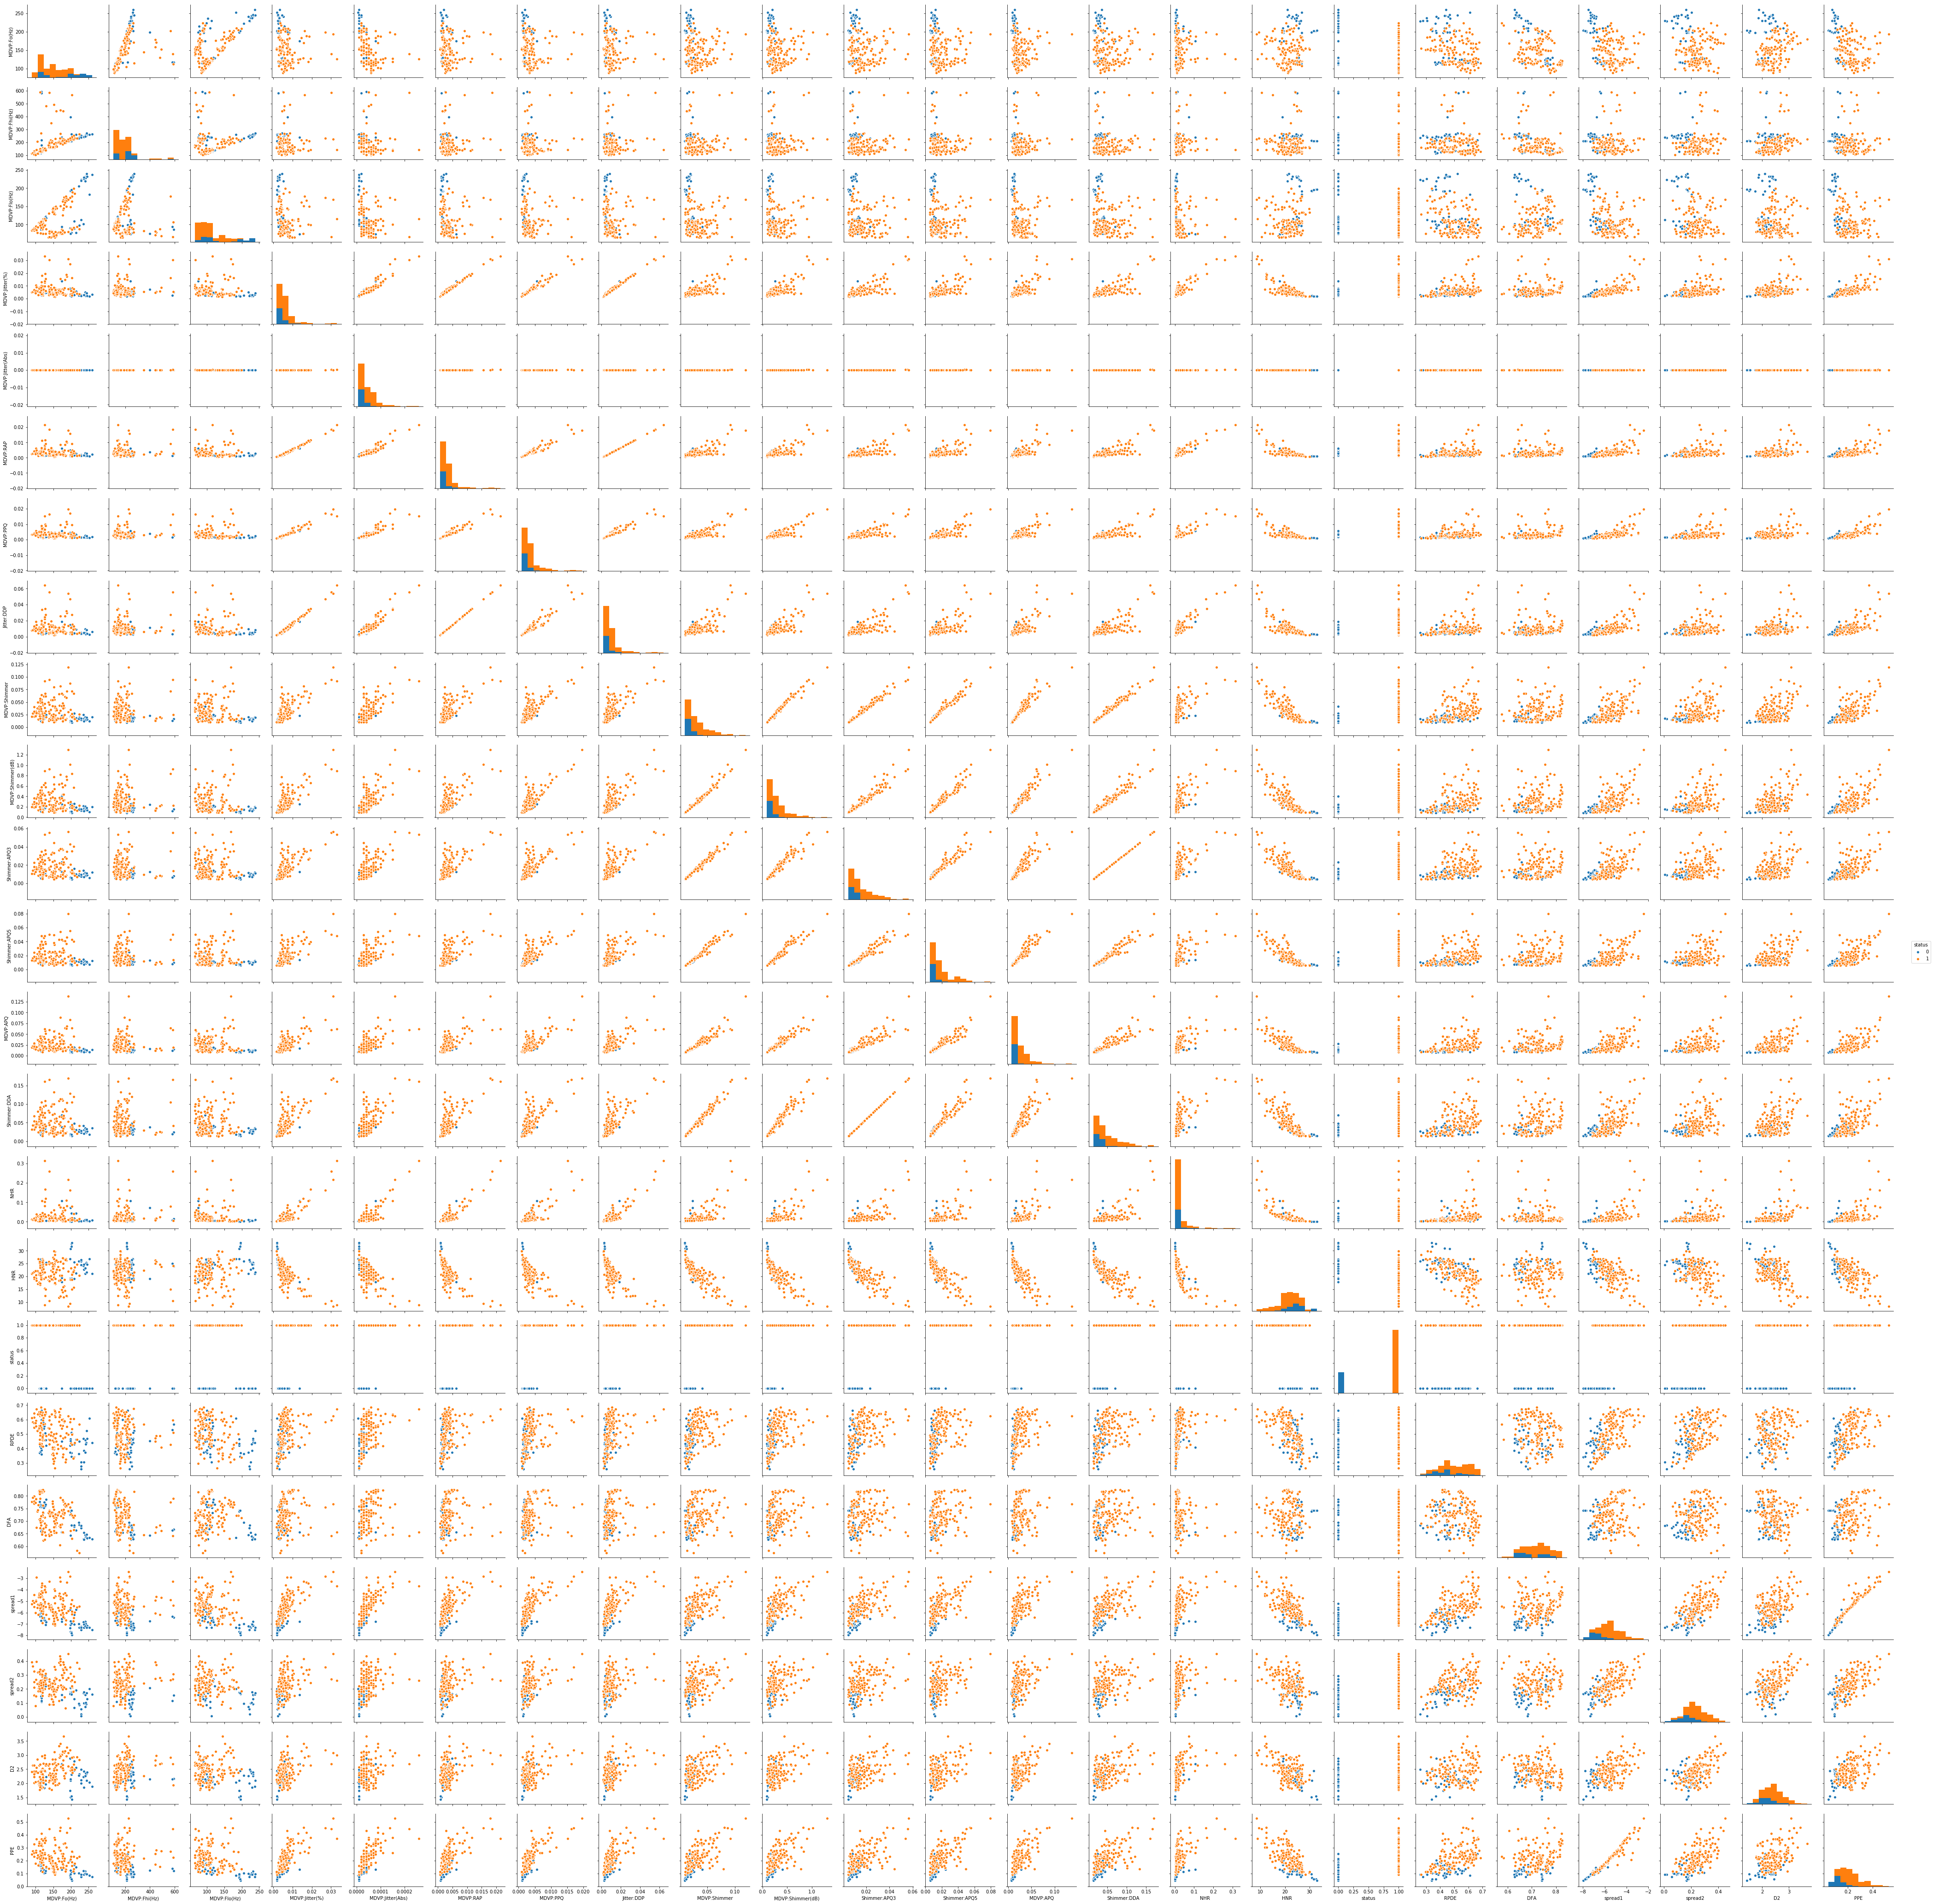

In [70]:
sns.pairplot(par, hue='status')

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


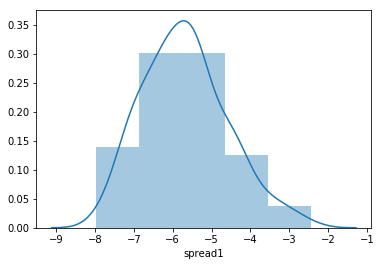

In [71]:
sns.distplot(par.spread1, bins=5)

Almost a normal distribution

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


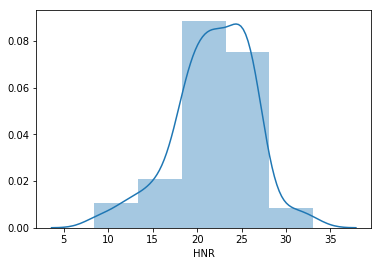

In [72]:
sns.distplot(par.HNR, bins=5)

# Removing Outliers

In [73]:
Q1 = par.quantile(0.25)
Q3 = par.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MDVP:Fo(Hz)         65.197000
MDVP:Fhi(Hz)        89.343000
MDVP:Flo(Hz)        55.727500
MDVP:Jitter(%)       0.003905
MDVP:Jitter(Abs)     0.000040
MDVP:RAP             0.002175
MDVP:PPQ             0.002095
Jitter:DDP           0.006520
MDVP:Shimmer         0.021380
MDVP:Shimmer(dB)     0.201500
Shimmer:APQ3         0.012020
Shimmer:APQ5         0.012800
MDVP:APQ             0.016320
Shimmer:DDA          0.036060
NHR                  0.019715
HNR                  5.877500
status               0.000000
RPDE                 0.166256
DFA                  0.087124
spread1              1.403904
spread2              0.104883
D2                   0.537330
PPE                  0.115529
dtype: float64


In [74]:
#input_var= par.drop(columns=['name','status'], axis=1)
#output_var= par.pop('status')

#par.drop(columns=['name','status'], axis=1, inplace=True)
check=par

In [75]:
#for a in par:
    #print((par[~((par<Q1-(1.5*IQR))|(par>Q3+(1.5*IQR)))].any(axis=1)).shape)
    #print((par[~((par< (Q1-1.5*IQR)) | (par > (Q3+1.5*IQR)) ).any(axis=1)]).shape)  
    #print(par[((par< (Q1-1.5*IQR)) | (par > (Q3+1.5*IQR)) ).any(axis=1)])

In [76]:
#Q1 = par['MDVP:Fo(Hz)'].quantile(0.25)
#Q3 = par['MDVP:Fo(Hz)'].quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)
#par[(par['MDVP:Fo(Hz)']< (Q1-1.5*IQR)) | (par['MDVP:Fo(Hz)'] > (Q3+1.5*IQR))]

In [77]:
for a in par:
    if a not in ["status","name"]:
        Q1 = par[a].quantile(0.25)
        #print("{x} Quantile 1 is {y} :".format(x=a, y=Q1))
        Q3 = par[a].quantile(0.75)
        #print("{x} Quantile 3 is {y}:" .format(x=a, y=Q3))
        IQR = Q3 - Q1
        #print("IQR is ".format(IQR))
        outliers=par[(par[a]< (Q1-1.5*IQR)) | (par[a] > (Q3+1.5*IQR))]
        if(len(outliers)>0):
            print("Outliers in {x} is {y}".format(x=a,y=outliers.shape))
        else:
            print("No Outliers in {x} is {y}".format(x=a,y=outliers.shape))
        #print(outliers)
        
        for h in outliers.index:
            if(h in par.index):
                print("to remove data at index",format(h) )
                if(h in range(0, (len(check)-1))):
                    print(len(check))
                    print(" h is available")
                    #print(check.iloc[187])
                    print(check.iloc[h])
                    check.drop(check.index[h], inplace=True)
                    print("dropped data at",format(h))
    
    



No Outliers in MDVP:Fo(Hz) is (0, 24)
Outliers in MDVP:Fhi(Hz) is (11, 24)
to remove data at index 73
195
 h is available
name                phon_R01_S19_2
MDVP:Fo(Hz)                112.014
MDVP:Fhi(Hz)               588.518
MDVP:Flo(Hz)               107.024
MDVP:Jitter(%)             0.00533
MDVP:Jitter(Abs)             5e-05
MDVP:RAP                   0.00268
MDVP:PPQ                   0.00329
Jitter:DDP                 0.00805
MDVP:Shimmer               0.02448
MDVP:Shimmer(dB)             0.226
Shimmer:APQ3               0.01373
Shimmer:APQ5               0.01375
MDVP:APQ                   0.01956
Shimmer:DDA                 0.0412
NHR                        0.00623
HNR                         24.178
status                           1
RPDE                      0.509127
DFA                       0.789532
spread1                   -5.38913
spread2                   0.306636
D2                         1.92871
PPE                       0.225461
Name: 73, dtype: object
dropped data a

In [78]:
valid=par[~((par< (Q1-1.5*IQR)) | (par> (Q3+1.5*IQR))).any(axis=1)]
#print(valid)
print(valid.info())
invalid=par[((par< (Q1-1.5*IQR)) | (par > (Q3+1.5*IQR))).any(axis=1)]
print(invalid.info())
#print(invalid)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 24 columns):
name                0 non-null object
MDVP:Fo(Hz)         0 non-null float64
MDVP:Fhi(Hz)        0 non-null float64
MDVP:Flo(Hz)        0 non-null float64
MDVP:Jitter(%)      0 non-null float64
MDVP:Jitter(Abs)    0 non-null float64
MDVP:RAP            0 non-null float64
MDVP:PPQ            0 non-null float64
Jitter:DDP          0 non-null float64
MDVP:Shimmer        0 non-null float64
MDVP:Shimmer(dB)    0 non-null float64
Shimmer:APQ3        0 non-null float64
Shimmer:APQ5        0 non-null float64
MDVP:APQ            0 non-null float64
Shimmer:DDA         0 non-null float64
NHR                 0 non-null float64
HNR                 0 non-null float64
status              0 non-null int64
RPDE                0 non-null float64
DFA                 0 non-null float64
spread1             0 non-null float64
spread2             0 non-null float64
D2                  0 non-null float64
PPE          

I have calculated the outliers for every column, it shows many rows. But when I calculate the outlier for entire dataframe it returns all rows. How to understand this..

# Split into train set and test set

In [79]:
X= check.drop(columns=['name','status'], axis=1)
Y= check.pop('status')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.30)

# Create the model using “entropy” method of reducing the entropy and fit it to training data. 

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. 

In [81]:
y_predict= dt_model.predict(x_test)
print("Train data score is : ")
print(dt_model.score(x_train , y_train))

print("Test data score is : ")
print(dt_model.score(x_test , y_test))

print(pd.DataFrame(metrics.confusion_matrix(y_test, y_predict)))

Train data score is : 
1.0
Test data score is : 
0.918918918918919
   0   1
0  8   1
1  2  26


# Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [103]:
dt_model_max = DecisionTreeClassifier(criterion = 'entropy' , max_depth=100,min_samples_leaf=5, min_samples_split=8)
dt_model_max.fit(x_train, y_train)
y_predict = dt_model_max.predict(x_test)
print("Train data score is : ")
print(dt_model_max.score(x_train , y_train))
print("Test data score is : ")
print(dt_model_max.score(x_test , y_test))
print("Matrix")
print(metrics.confusion_matrix(y_test, y_predict))

Train data score is : 
0.9418604651162791
Test data score is : 
0.8378378378378378
Matrix
[[ 7  2]
 [ 4 24]]


# Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? 

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(x_train, y_train)


y_predict = rfcl.predict(x_test)

print("Train data score is : ")
print(rfcl.score(x_train , y_train))
print("Test data score is : ")
print(rfcl.score(x_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))

Train data score is : 
0.9418604651162791
Test data score is : 
0.918918918918919
[[ 6  3]
 [ 0 28]]
